Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


Dataset Key Information:
loan_id	Unique loan ID
no_of_dependents	Number of dependents of the applicant
education	Education level of the applicant
self_employed	If the applicant is self-employed or not
income_annum	Annual income of the applicant
loan_amount	Loan amount requested by the applicant
loan_tenure	Tenure of the loan requested by the applicant (in Years)
cibil_score	CIBIL score of the applicant
residential_asset_value	Value of the residential asset of the applicant
commercial_asset_value	Value of the commercial asset of the applicant
luxury_asset_value	Value of the luxury asset of the applicant
bank_assets_value	Value of the bank asset of the applicant
loan_status	Status of the loan (Approved/Rejected)

In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("loan_approval_dataset.csv")

In [6]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
print(data.info())
print(data.describe())
for col in data.columns:
    print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
          

In [11]:
columns_to_remove = ['loan_id']

# Remove the specified columns
data.drop(columns=columns_to_remove, inplace=True)

In [12]:
print("Dataset Shape:", data.shape)

Dataset Shape: (4269, 12)


In [13]:
# Label Encoding
data[' education'] = data[' education'].map({' Not Graduate':0, ' Graduate':1})
data[' self_employed'] = data[' self_employed'].map({' No':0, ' Yes':1})
data[' loan_status'] = data[' loan_status'].map({' Rejected':0, ' Approved':1})

In [14]:
data.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [16]:
import seaborn

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

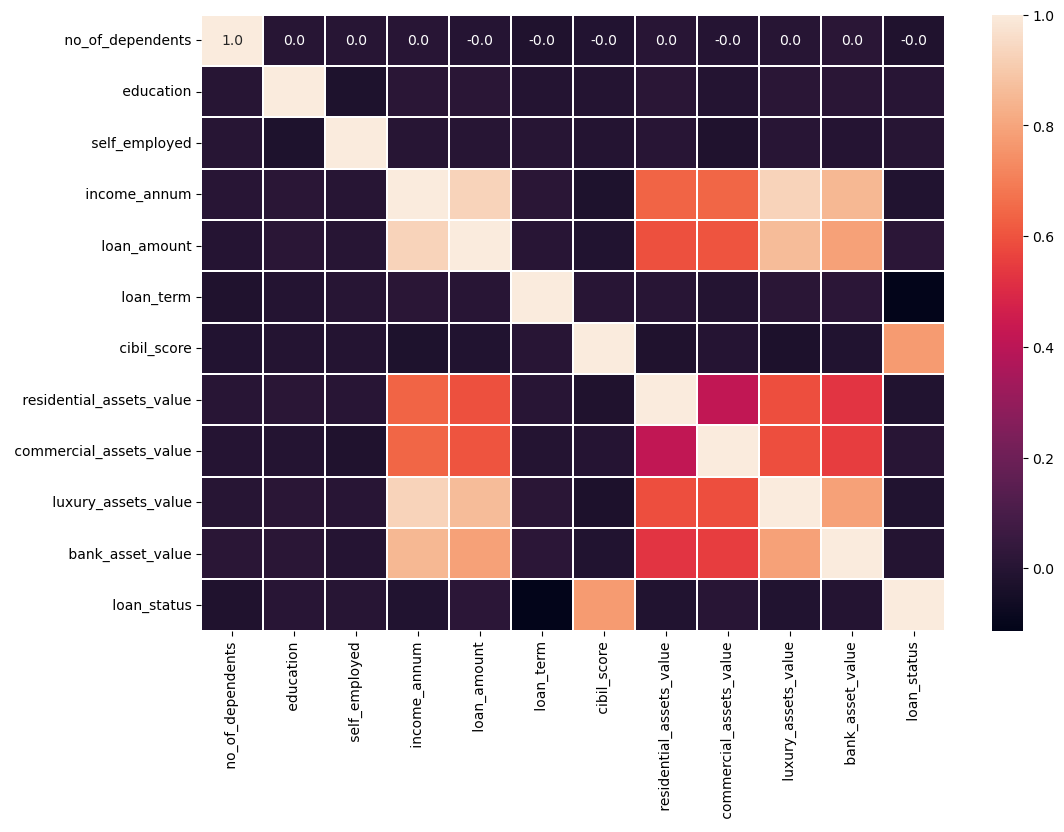

In [21]:
plt.figure(figsize=(12,8))
seaborn.heatmap(data.corr(),  annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [23]:
data.corr()[' loan_status']

 no_of_dependents           -0.018114
 education                   0.004918
 self_employed               0.000345
 income_annum               -0.015189
 loan_amount                 0.016150
 loan_term                  -0.113036
 cibil_score                 0.770518
 residential_assets_value   -0.014367
 commercial_assets_value     0.008246
 luxury_assets_value        -0.015465
 bank_asset_value           -0.006778
 loan_status                 1.000000
Name:  loan_status, dtype: float64

The heatmap of correlation values shows several strong connections:

Movable Assets and Immovable Assets
Income and Movable Assets
Income and Immovable Assets
Movable Assets and Loan Amount
Immovable Assets and Loan Amount
Loan Status and Cibil Score
Loan Amount and Income
It makes sense that movable and immovable assets are related since they're both types of assets. Similarly, income is linked to both movable and immovable assets, as those with higher income tend to have more assets.

Now, let's look at how assets relate to the loan amount, as well as how income connects to the loan amount. We've already discussed the connection between loan status and CIBIL score in the previous part.

Machine Learning Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(' loan_status', axis=1), data[' loan_status'], test_size=0.2, random_state=42)

1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)

In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6288056206088993


2. Support Vector Classification (SVC)


In [45]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


3.Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [48]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


4. Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


Text(518.4494949494949, 0.5, 'Actual')

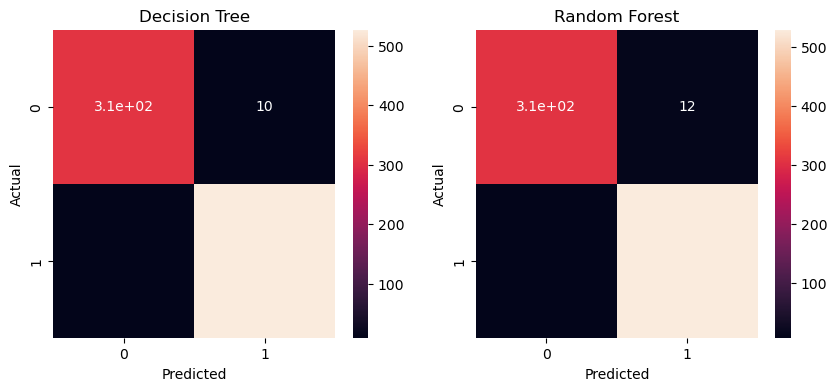

In [52]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
seaborn.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
seaborn.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

In [53]:
import time

Random Forest with 1 trees yielded accuracy of: 0.9614  with a total loop time of: 0.027
Random Forest with 100 trees yielded accuracy of: 0.9824  with a total loop time of: 0.175
Random Forest with 200 trees yielded accuracy of: 0.9789  with a total loop time of: 0.322
Random Forest with 300 trees yielded accuracy of: 0.9813  with a total loop time of: 0.465
Random Forest with 400 trees yielded accuracy of: 0.9801  with a total loop time of: 0.649
Random Forest with 500 trees yielded accuracy of: 0.9801  with a total loop time of: 0.819
Random Forest with 600 trees yielded accuracy of: 0.9813  with a total loop time of: 0.937
Random Forest with 700 trees yielded accuracy of: 0.9801  with a total loop time of: 1.084
Random Forest with 800 trees yielded accuracy of: 0.9801  with a total loop time of: 1.224
Random Forest with 900 trees yielded accuracy of: 0.9801  with a total loop time of: 1.365
Random Forest with 1000 trees yielded accuracy of: 0.9801  with a total loop time of: 1.5859

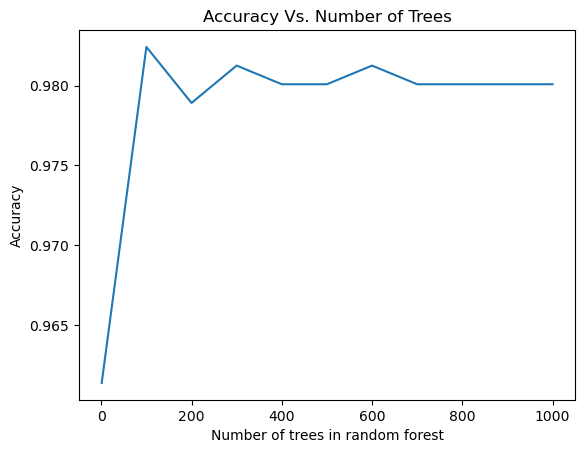

In [54]:
#Find run times, accuracy for random forest classifiers with trees between (1, 1000).
n_trees = [1] + [100 * i for i in range (1, 11)]
accuracy_scores = []
loopTimes = []

#Main Loop
for n in n_trees:
    #Start timing loop
    startTime = time.time()
    #Train and get predictions from current random forest
    this_random_forest = RandomForestClassifier(random_state = 0, n_estimators = n, min_impurity_decrease = .0001, n_jobs = 14)
    this_random_forest.fit(X_train, y_train)
    this_yhat = this_random_forest.predict(X_test)
    #Get accuracy of current random forest
    this_accuracy = accuracy_score(y_true = y_test, y_pred = this_yhat)
    accuracy_scores.append(this_accuracy)
    #Stop timing loop now that large calculations are done, record results
    endTime = time.time()
    totalLoopTime = endTime - startTime
    loopTimes.append(totalLoopTime)
    #Print results for this random forest
    print("Random Forest with " + str(n) + " trees yielded accuracy of: " + str(round(this_accuracy, 4)), " with a total loop time of: " + str(round(totalLoopTime, 4)))

#This makes a plot of Accuracy Vs. Number of Trees
plt.plot(n_trees, accuracy_scores)
plt.xlabel("Number of trees in random forest")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs. Number of Trees")
plt.show()

Summary of Model Performance for Loan Approval Prediction

When looking at different ways to predict if loans will be approved or not, we found that the Decision Tree model worked really well. It was accurate and could predict outcomes quite accurately. The Random Forest model also did a good job.

However, the models called Support Vector Machine (SVM) and Logistic Regression didn't work well for this dataset. They didn't predict as accurately as the Decision Tree and Random Forest models.

This tells us that picking the right model is really important. The Decision Tree and Random Forest models were great for this data, but SVM and Logistic Regression weren't a good fit.